# Inicio
Comenzamos importando las librerías necesarias, la url de la página que hemos elegido y comprobando que la respuestas es OK.

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# la url de la pagina que contiene los datos
url = 'https://es.wikipedia.org/wiki/Anexo:Ganadoras_del_Premio_Nobel'
# realizamos la solicitud a la página y comprobamos que es exitosa
website_data = requests.get(url)
website_data.status_code

200

In [2]:
# parseamos html
website_html = BeautifulSoup(website_data.text, 'html.parser')
# imprimimos html estructurado
# print(website_html.prettify())
# encontramos la tabla
table_content = website_html.find('table')

# Corrección de errores
En un primer momento, se obtuvo la información de la tabla y luego se vio que no era correcta. El problema es que 
algunas filas de la tabla comparten información como las premiadas del mismo año. Esto se hace por medio de un colspan en html
y el resultado es que algunas líneas no tienen todos los atributos, tienen menos, con lo cual el datafram obtenido estaba descolocado.
Dejo el código comentado para que se pueda ver el primer intento que se hizo.

In [3]:
# extraemos informacion de la tabla
# los nombres de las columnas se encuentran en los <th> de la tabla
columns = table_content.find_all('th')
column_names = [column.text.removesuffix('\n') for column in columns] # extraemos los nombres
column_names.pop(1) # eliminamos la segunda columna Imagen
column_names

['Año', 'Premiada', 'País', 'Categoría', 'Motivación']

In [29]:
# extraemos la informacion de las columnas
# columns_content = table_content.find_all('td')
# columns_content_clean = [column.text.removesuffix('\n') for column in columns_content] # extraemos el contenido
# columns_content_clean

#rows_content = []
#for i in range(0,len(columns_content_clean),6):
 #   rows_content.append([columns_content_clean[i], columns_content_clean[i+2], columns_content_clean[i+3],
  #                       columns_content_clean[i+4], columns_content_clean[i+5]])
    

In [5]:
# formamos un dataframe a partir de la informacion de la tabla
df = pd.DataFrame(rows_content, columns = column_names)
df.head()

,Año,Premiada,País,Categoría,Motivación
0,1903,"Curie, MarieMarie Curie(compartido con Pierre ...",Francia Polonia,Física,«En reconocimiento a los extraordinarios servi...
1,1905,"Suttner, Bertha vonBertha von Suttner",Austria-Hungría,Paz,Presidenta honoraria de la Oficina Internacion...
2,1909,"Lagerlof, SelmaSelma Lagerlöf",Suecia Suecia,Literatura,"«En reconocimiento al elevado idealismo, la ví..."
3,1911,"Curie, MarieMarie Curie",Francia Polonia,Química,Por su descubrimiento del radio y el polonio.[...
4,1926,"Deledda, GraziaGrazia Deledda",Italia,Literatura,"«Por sus escritos inspiradamente idealistas, q..."


In [26]:
# Al revisar el dataframe entero es cuando nos damos cuenta de las inconsistencias.
df

,Año,Premiada,País,Categoría,Motivación
0,1903,"Curie, MarieMarie Curie(compartido con Pierre ...",Francia Polonia,Física,«En reconocimiento a los extraordinarios servi...
1,1905,"Suttner, Bertha vonBertha von Suttner",Austria-Hungría,Paz,Presidenta honoraria de la Oficina Internacion...
2,1909,"Lagerlof, SelmaSelma Lagerlöf",Suecia Suecia,Literatura,"«En reconocimiento al elevado idealismo, la ví..."
3,1911,"Curie, MarieMarie Curie",Francia Polonia,Química,Por su descubrimiento del radio y el polonio.[...
4,1926,"Deledda, GraziaGrazia Deledda",Italia,Literatura,"«Por sus escritos inspiradamente idealistas, q..."
5,1928,"Undset, SigridSigrid Undset","Noruega Noruega (Nacida en Kalundborg, actual ...",Literatura,«Principalmente por sus poderosas descripcione...
6,1931,"Addams, JaneJane Addams(compartido con Nichola...",Estados Unidos,Paz,"Socióloga, pionera del trabajo social y el fem..."
7,1935,"Joliot-Curie, IreneIrène Joliot-Curie(comparti...",Francia,Química,«Por su síntesis de nuevos elementos radiactiv...
8,1938,"Buck, Pearl S.Pearl S. Buck",Estados Unidos,Literatura,«Por sus descripciones ricas y verdaderamente ...
9,1945,"Mistral, GabrielaGabriela Mistral",Chile Chile,Literatura,"«Por su poesía lírica que, inspirada por poder..."


# Corrección de errores
Por tanto, nos disponemos a corregirlo. 
Tras haber estudiado los casos en función de los atributos de cada fila, son los siguientes:
- 6 atributos: información completa
- 5 atributos: comparten el año
- 4 atributos: no hay caso
- 3 atributos: comparten el año, la categoría y la motivación
- 2 atributos: comparten el año, el país, la categoría y la motivación (todo menos el nombre y a imagen)
Rellenaremos los atributos que falten con un string vacío.

In [85]:
columns_content = table_content.find_all('tr')
rows_content_final = []
this_row = []

for i in range(len(columns_content)):
    row_content_dirty = columns_content[i].find_all('td')
    row_content = [row.text.removesuffix('\n') for row in row_content_dirty]
    if(len(row_content) == 6):
        this_row = [row_content[0], row_content[2], row_content[3], row_content[4], row_content[5]]
        rows_content_final.append(this_row)
    elif(len(row_content) == 5): # comparten el año
        this_row = [previous_row[0], row_content[1], row_content[2], row_content[3], row_content[4]]
        rows_content_final.append(this_row)
    elif(len(row_content) == 3): # comparten año, categoría y motivación
        this_row = [previous_row[0], row_content[1], row_content[2], previous_row[3], previous_row[4]]
        rows_content_final.append(this_row)
    elif(len(row_content) == 2): # comparten año, país, categoría y motivación
        this_row = [previous_row[0], row_content[1], previous_row[2], previous_row[3], previous_row[4]]
        rows_content_final.append(this_row)
    previous_row = this_row
    
# En la fila 16 había un caso de rowspan, por lo que comprobamos que todos los datos están completos.     
rows_content_final[16]


['1976',
 'Maguire, MaireadMairead Maguire',
 'Reino Unido\xa0Reino Unido',
 'Paz',
 'Fundadoras del Northern Ireland Peace Movement (Movimiento por la Paz de Irlanda del Norte), después renombrado Community of Peace People (Comunidad de Gente Pacífica).[26]\u200b']

In [90]:
# formamos un dataframe a partir de la informacion de la tabla
df = pd.DataFrame(rows_content_final, columns = column_names)
df.head()

,Año,Premiada,País,Categoría,Motivación
0,1903,"Curie, MarieMarie Curie(compartido con Pierre ...",Francia Polonia,Física,«En reconocimiento a los extraordinarios servi...
1,1905,"Suttner, Bertha vonBertha von Suttner",Austria-Hungría,Paz,Presidenta honoraria de la Oficina Internacion...
2,1909,"Lagerlof, SelmaSelma Lagerlöf",Suecia Suecia,Literatura,"«En reconocimiento al elevado idealismo, la ví..."
3,1911,"Curie, MarieMarie Curie",Francia Polonia,Química,Por su descubrimiento del radio y el polonio.[...
4,1926,"Deledda, GraziaGrazia Deledda",Italia,Literatura,"«Por sus escritos inspiradamente idealistas, q..."


In [91]:
# Revisamos el dataframe entero para comprobar de un vistazo que ya no existen inconsistencias.
df

,Año,Premiada,País,Categoría,Motivación
0,1903,"Curie, MarieMarie Curie(compartido con Pierre ...",Francia Polonia,Física,«En reconocimiento a los extraordinarios servi...
1,1905,"Suttner, Bertha vonBertha von Suttner",Austria-Hungría,Paz,Presidenta honoraria de la Oficina Internacion...
2,1909,"Lagerlof, SelmaSelma Lagerlöf",Suecia Suecia,Literatura,"«En reconocimiento al elevado idealismo, la ví..."
3,1911,"Curie, MarieMarie Curie",Francia Polonia,Química,Por su descubrimiento del radio y el polonio.[...
4,1926,"Deledda, GraziaGrazia Deledda",Italia,Literatura,"«Por sus escritos inspiradamente idealistas, q..."
5,1928,"Undset, SigridSigrid Undset","Noruega Noruega (Nacida en Kalundborg, actual ...",Literatura,«Principalmente por sus poderosas descripcione...
6,1931,"Addams, JaneJane Addams(compartido con Nichola...",Estados Unidos,Paz,"Socióloga, pionera del trabajo social y el fem..."
7,1935,"Joliot-Curie, IreneIrène Joliot-Curie(comparti...",Francia,Química,«Por su síntesis de nuevos elementos radiactiv...
8,1938,"Buck, Pearl S.Pearl S. Buck",Estados Unidos,Literatura,«Por sus descripciones ricas y verdaderamente ...
9,1945,"Mistral, GabrielaGabriela Mistral",Chile Chile,Literatura,"«Por su poesía lírica que, inspirada por poder..."


## Representación gráfica 
Histograma para ver la frecuencia de premiadas por año.

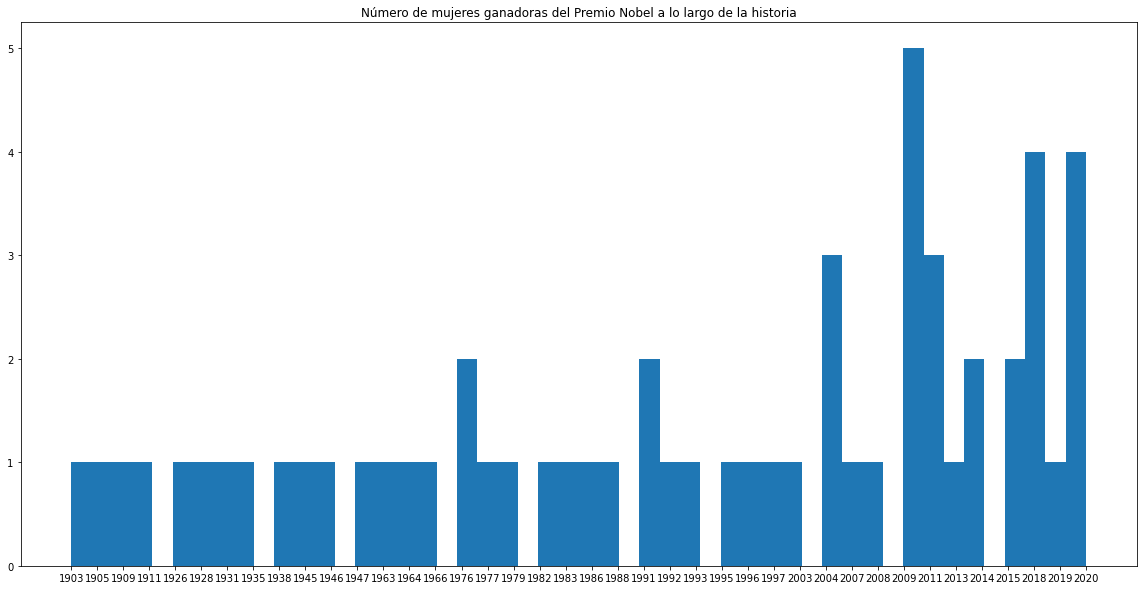

In [109]:
fig = plt.figure(figsize=(20,10))
plt.title("Número de mujeres ganadoras del Premio Nobel a lo largo de la historia")
plt.hist(df.Año, bins=50)
plt.show()

# Exportar a CSV

In [99]:
df.to_csv('mujeresnobel.csv') 